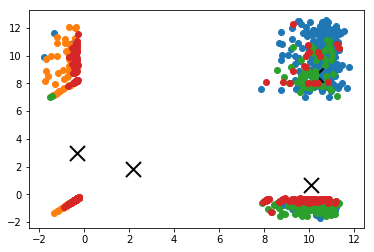

In [48]:
# Q2-a: Clustering for text analysis - capture Document
import numpy as np
from matplotlib import pyplot
from sklearn.cluster import KMeans

# Read the file
data = np.load("science2k-doc-word.npy")
k = 4

# Reference: http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
# Initialize K-means and test various values of k
def initialize_KMeans(k):
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels = model.labels_
    centroids = model.cluster_centers_
    return model, labels, centroids

# Keep plotting the clusters and centroid until the members of the clusters no longer change.
def plot_clusters_centroids(data, k, labels, centroids):
    for i in range(k):
        # select only data observations with cluster label == i
        ds = data[np.where(labels==i)]
        # plot the data observations
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()

model, labels, centroids = initialize_KMeans(k)
plot_clusters_centroids(data, k, labels, centroids)

In [49]:
# Reference: 
# https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr
# https://mubaris.com/posts/kmeans-clustering/

# Find the closest indices to each cluster center
def get_closest_indices_to_centroids(model, k):
    indices_list = []
    for i in range(k):
        # The distance to the i'th centroid for each point in an array data
        distance = model.transform(data)[:, i]
        # The indices of the 10 closest to i'th centroid
        indices = np.argsort(distance)[::][:10]
        indices_list.append(indices)
        
    return indices_list

# Find the largest positive distance from the average value across all data.
def get_largest_indices_to_centroids(model, k):
    indices_list = []
    for i in range(k):
        # The distance to the i'th centroid for each point in an array data
        distance = model.transform(data)[:, i]
        # The indices of the 10 closest to i'th centroid
        indices = np.argsort(distance)[::-1][:10]
        indices_list.append(indices)
        
    return indices_list

indices_list_word = get_largest_indices_to_centroids(model, k)
indices_list_title = get_closest_indices_to_centroids(model, k)

In [50]:
def get_top10_to_centroids(fileName, indices_list):
    items = open(fileName, "r")    
    item_list = []
    for item in items:
        new_item = item.rstrip()
        item_list.append(new_item)
        
    counter = 1
    for indices in indices_list:
        print('\nTop 10 of cluster #' + str(counter) + ': ')
        for index in indices:
            print(item_list[int(index)])
        counter += 1

print('[Top 10 words of each cluster in order of the largest positive distance from the average value across all data.]')
get_top10_to_centroids("science2k-vocab.txt", indices_list_word)
print('\n[Top ten documents that fall closest to each cluster center.]')
get_top10_to_centroids("science2k-titles.txt", indices_list_title)

[Top 10 words of each cluster in order of the largest positive distance from the average value across all data.]

Top 10 of cluster #1: 
identity
antibody
multiple
local
interference
understanding
sex
stimulus
structural
measurement

Top 10 of cluster #2: 
local
antibody
natl
stimulus
spin
sex
spectrum
bound
project
mutations

Top 10 of cluster #3: 
local
antibody
multiple
identity
stimulus
interference
structural
natl
mutations
spectrum

Top 10 of cluster #4: 
antibody
local
stimulus
natl
identity
multiple
sex
mutations
interference
spin

[Top ten documents that fall closest to each cluster center.]

Top 10 of cluster #1: 
"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"
"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"
"Thermal, Catalytic, Regiospecific Functionalization of Alkanes"
"Algorithmic Gladiators Vie for Digital Glory"
"Similar Requirements of a Plant Symbiont and a Mammalian Pathogen

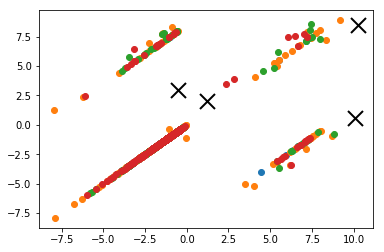

In [53]:
# Q2-b: Clustering for text analysis - capture Term
# Read the file
dataTerm = np.load("science2k-word-doc.npy")
kTerm = 4

# Initialize K-means and test various values of k
modelTerm, labelsTerm, centroidsTerm = initialize_KMeans(kTerm)

# Keep plotting the clusters and centroid until the members of the clusters no longer change.
plot_clusters_centroids(dataTerm, kTerm, labelsTerm, centroidsTerm)

In [54]:
# Find closest indices to each cluster center
indicesTerm_list = get_closest_indices_to_centroids(modelTerm, kTerm)

get_top10_to_centroids("science2k-vocab.txt", indicesTerm_list)


Top 10 of cluster #1: 
release
expressing
volume
fig
width
cells
obtained
right
mediated
land

Top 10 of cluster #2: 
expressing
volume
mediated
states
described
receptor
right
release
fig
land

Top 10 of cluster #3: 
hand
exhibit
cross
expressing
class
volume
able
clock
transgenic
detect

Top 10 of cluster #4: 
tail
expressing
volume
right
cross
described
receptor
states
second
trend
